# Performing linecuts using the Scissors class

## Importing the `Scissors` class

In [3]:
from nxs_analysis_tools import Scissors, load_transform
from nxs_analysis_tools.datasets import cubic

sample_directory = cubic() # Download the example data into cache directory

from nexusformat.nexus import NXdata, NXfield
import numpy as np

## Setting up a linecut - Method 1

You can set the data, linecut center, integration window, and integration axis when you initialize the `Scissors` object.

In [13]:
data = load_transform(f'{sample_directory}/cubic_15.nxs')

data:NXdata
  @axes = ['Qh', 'Qk', 'Ql']
  @signal = 'counts'
  Qh = float64(100)
  Qk = float64(150)
  Ql = float64(200)
  counts = float64(100x150x200)


In [14]:
scissors = Scissors(data, center=(0,0,0), window=(0.75,0.2,0.15), axis=None)

## Setting up a linecut - Method 2

...or you can set them one by one after initializing the object.

In [15]:
scissors = Scissors()

In [16]:
scissors.set_data(data)

In [17]:
scissors.set_center((0,0,0))

In [18]:
scissors.set_window((0.75,0.2,0.15))

## Performing a linecut

You can use `.cut_data()` to perform the cut, returning an `NXdata` object.

In [19]:
linecut = scissors.cut_data()

## Plotting a linecut

The `.integration_window` attribute stores a `tuple` of `slice` objects over which the integration was performed.

In [20]:
scissors.integration_window

(slice(np.float64(-0.75), np.float64(0.75), None),
 slice(np.float64(-0.2), np.float64(0.2), None),
 slice(np.float64(-0.15), np.float64(0.15), None))

To show where the integration was performed, use the `.highlight_integration_window()` method.

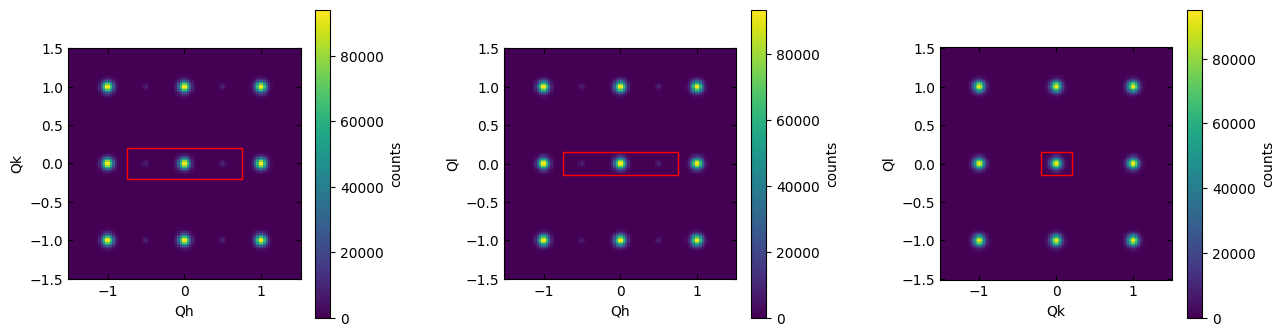

(<matplotlib.collections.QuadMesh at 0x11a2b5174d0>,
 <matplotlib.collections.QuadMesh at 0x11a269bde50>)

In [21]:
scissors.highlight_integration_window()

Use the optional `width` and `height` parameters to zoom in on the region of interest.

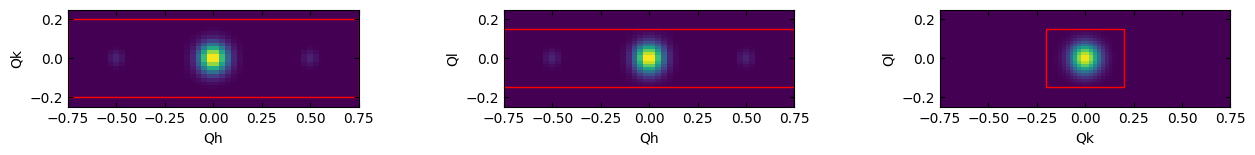

(<matplotlib.collections.QuadMesh at 0x11a270be710>,
 <matplotlib.collections.QuadMesh at 0x11a2712a490>)

In [24]:
scissors.highlight_integration_window(width=1.5, height=0.5, cbar=False)

The `label` parameter allows you to specify a label for the highlighted region.

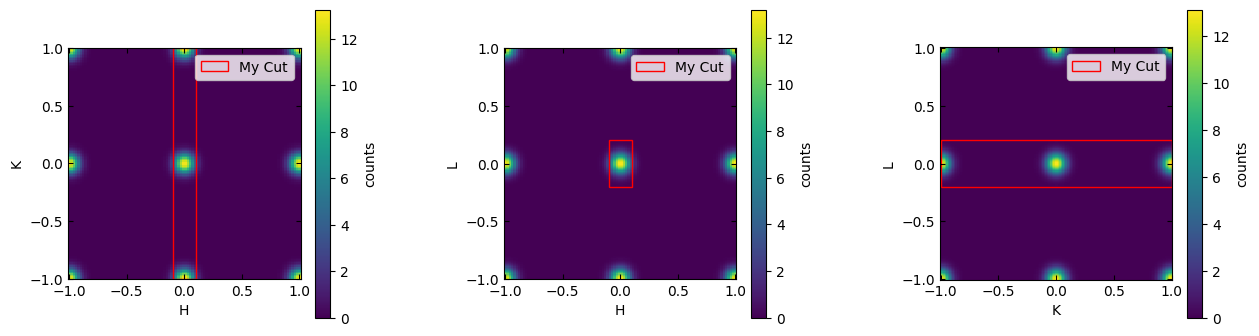

(<matplotlib.collections.QuadMesh at 0x232492e9a90>,
 <matplotlib.collections.QuadMesh at 0x2324805b4d0>)

In [11]:
scissors.highlight_integration_window(label='My Cut')

If you only want to visualize the region that is being integrated, then use the `plot_integration_window` method.

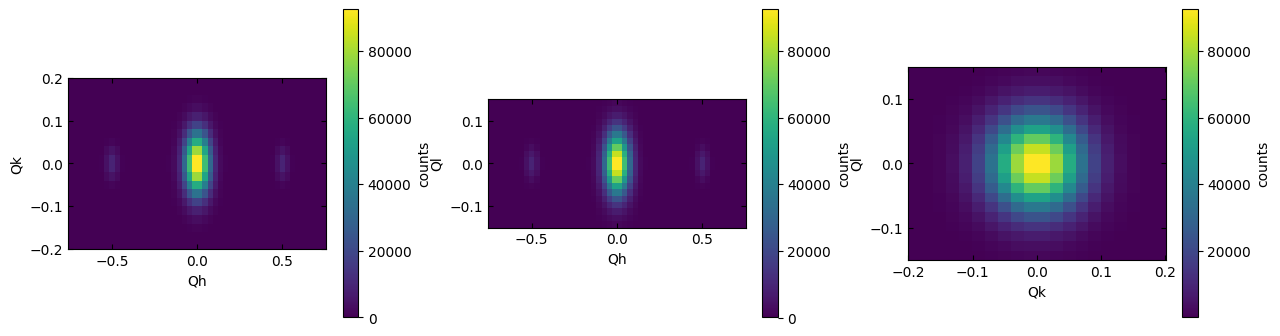

(<matplotlib.collections.QuadMesh at 0x11a2751fc50>,
 <matplotlib.collections.QuadMesh at 0x11a27563750>)

In [25]:
scissors.plot_integration_window()

The `.plot()` method of the NXdata object can be used to generate a basic plot of the linecut.

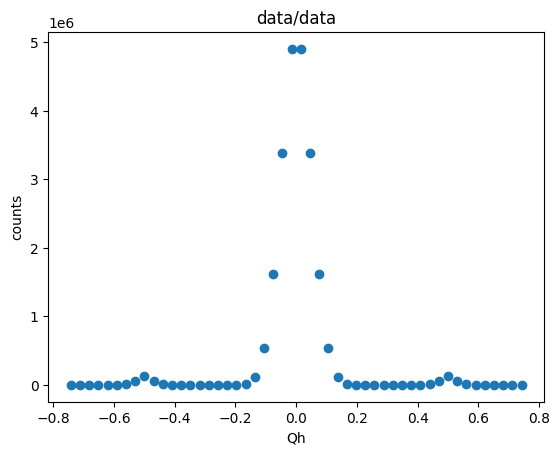

In [26]:
linecut.plot()